# Assignment Week 8
Data Augmentation and AE Networks usinng MNIST

In [42]:
#MNIST is a build in Pytorch dataset
from torchvision import datasets as dts
from torchvision.transforms import ToTensor
train = dts.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test = dts.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [43]:
train[0][0].shape

torch.Size([1, 28, 28])

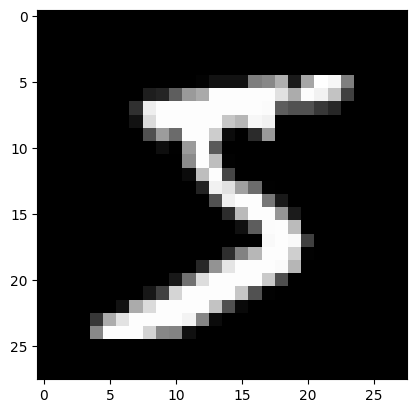

In [44]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0].reshape((28,28)), cmap='gray')

## Exercise 1
Augment the training data with 6 differnet suitable augmentations
* use the PyTorch augmentation framework -> https://pytorch.org/vision/stable/transforms.html
* visualize some examples

In [57]:
from torchvision.transforms import v2
import torch
import matplotlib.pyplot as plt


transforms = v2.Compose([
    v2.RandomResizedCrop(size=(28, 28), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(degrees=(0, 180)),
    v2.RandomVerticalFlip(p=0.5),
    v2.RandomApply(transforms=[v2.RandomCrop(size=(28, 28))], p=0.5),



    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.1307], std=[0.3081]),
])






In [55]:
train.data.shape


torch.Size([60000, 28, 28])

In [58]:
# creating augmented traindata

augmented =  [transforms(img.unsqueeze(0)) for img in train.data]

In [53]:
augmented = torch.stack(augmented).shape

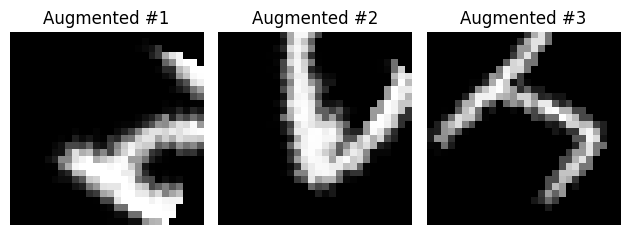

In [62]:
images = augmented[:3]


for i, img in enumerate(images):
    plt.subplot(1, 3, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Augmented #{i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Exercise 2
Build and train a MLP Autoencoder with
* 2 Encoder Layers
* 2 Decoder Layers
* Identity Loss

## Exercise 3


Use the Gaussian Noise as augmentation and your AE to remove the noise.
* visualize input and output examples

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

## Exercise 4
Clustering: extract the latent space representations of the train data and apply K-Means (fron Scikit-Learn) with k=10. Use the data lables to evaluate the cluter quality.